<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_Testing/blob/main/UAS_Prototype_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada program ini akan dilakukan deteksi Face Mask Detection dengan metode CNN
(Convolution Neural Network)

Sumber data : https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


Anggota kelompok :

Arya Wahjoe Setiawan (03)

Noorr Afiad (12)

Importing dependancies

In [ ]:
# Import Library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dependancies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# os.listdir = list to your directory that contain all of masked people pictures
file_gambar_masker = os.listdir('/content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask')
# print the first five file name on the list
print(file_gambar_masker[0:5])
# print the last five file names on the list
print(file_gambar_masker[-5:])

['with_mask_3407.jpg', 'with_mask_3352.jpg', 'with_mask_3476.jpg', 'with_mask_3511.jpg', 'with_mask_3459.jpg']
['with_mask_1598.jpg', 'with_mask_1467.jpg', 'with_mask_1895.jpg', 'with_mask_1192.jpg', 'with_mask_1586.jpg']


In [ ]:
file_gambar_nonmasker = os.listdir('/content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask')
print(file_gambar_nonmasker[0:5])
print(file_gambar_nonmasker[-5:])

['without_mask_40.jpg', 'without_mask_3108.jpg', 'without_mask_2687.jpg', 'without_mask_292.jpg', 'without_mask_3487.jpg']
['without_mask_2498.jpg', 'without_mask_1947.jpg', 'without_mask_2199.jpg', 'without_mask_2074.jpg', 'without_mask_1329.jpg']


In [ ]:
# Check how many pictures on the list
print('Number of with mask images:', len(file_gambar_masker))
print('Number of without mask images:', len(file_gambar_nonmasker))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for the two class of images

In [ ]:
# create the labels

# the masked people will be labeled number 1
bermasker_labels = [1]*3725

# the nonmasked people will be labeled number 1
nonmasker_labels = [0]*3828

In [ ]:
# print the first 5 of the pictures on the masked people list
print(bermasker_labels[0:5])

# print the first 5 of the pictures on the nonmasked people list
print(nonmasker_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
# count the number of images
print(len(bermasker_labels))
print(len(nonmasker_labels))

3725
3828


In [ ]:
# Combine the two sets of labels
# The values won't be added if it a numpy array but when you add the two list it will be combined
labels = bermasker_labels + nonmasker_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

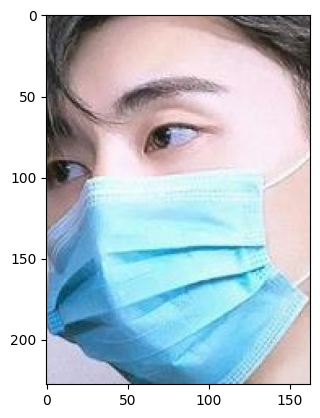

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

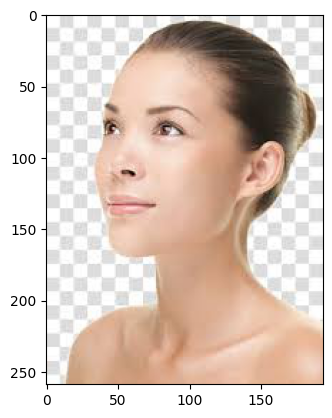

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [ ]:
# convert images to numpy arrays+

masker_path = '/content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask/'

# Create an empty list named data
data = []

# Creating a for loop
# With for loop we can read all of the images
for img_file in file_gambar_masker:

# File image has been read using pillow library with open function
  image = Image.open(masker_path + img_file)
# Resize the image to 128
  image = image.resize((128,128))
# Convert to RGB so it can be processed by neural network
  image = image.convert('RGB')
# Convert object to numpy array
  image = np.array(image)
  data.append(image)



nonmasker_path = '/content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask/'


for img_file in file_gambar_nonmasker:


  image = Image.open(nonmasker_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Show the data type
type(data)

list

In [ ]:
# Contain the total number of image
len(data)

7553

In [ ]:
# Showing the data 0 pixel value
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
# Show the data 0 type
type(data[0])

numpy.ndarray

In [ ]:
# Check the data 0 type
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
# check the type from section X
type(X)

numpy.ndarray

In [ ]:
# check the type from section Y
type(Y)

numpy.ndarray

In [ ]:
# Print the shape from both section
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Splitting data into train and test

In [ ]:
# X for image array and Y for labels array
# Take 20% of the data as testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# print the shape of original array
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
# X train befor scaling
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
# X train after scaling
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

Building a neural network

In [ ]:
# Import tensorflow and Keras
# Temporflow is library to build neural network
# Keras is a wrapper of these library
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Create a number of classes
num_of_classes = 2

# create a variable as model
model = keras.Sequential()

# Adding layer to neural network
# Relu - rectified linear unit
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Add flatten layer
model.add(keras.layers.Flatten())

# Add dense layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
# Set  optimization algorithm and loss function matrix to a neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
# set to 5 epochs because there isn't too much dataset
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 164s 958ms/step - loss: 0.4718 - acc: 0.7957 - val_loss: 0.4091 - val_acc: 0.8017
Epoch 2/5
170/170 [==============================] - 158s 933ms/step - loss: 0.3045 - acc: 0.8771 - val_loss: 0.3021 - val_acc: 0.8678
Epoch 3/5
170/170 [==============================] - 162s 952ms/step - loss: 0.2599 - acc: 0.9029 - val_loss: 0.2251 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 162s 954ms/step - loss: 0.2125 - acc: 0.9180 - val_loss: 0.2210 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 163s 959ms/step - loss: 0.1710 - acc: 0.9319 - val_loss: 0.2117 - val_acc: 0.9256


Model Evaluation

In [ ]:
# Print the accuracy rate
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Tes Akurasi =', accuracy)

48/48 [==============================] - 12s 243ms/step - loss: 0.1846 - acc: 0.9332
Tes Akurasi = 0.9331568479537964


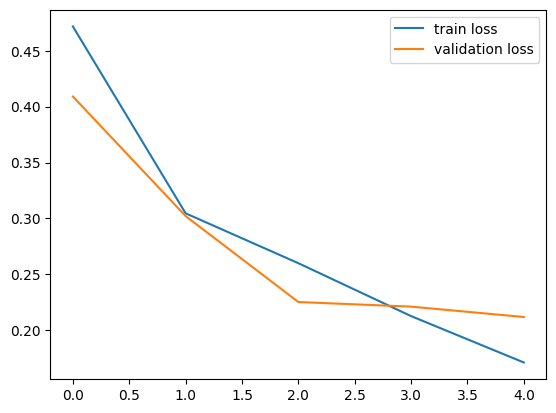

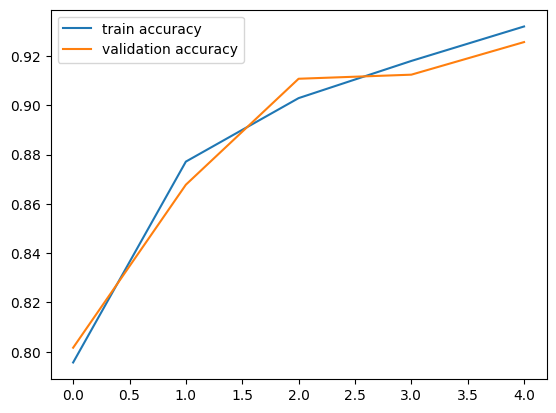

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Build an predictive system

Masukkan path gambar yang akan di periksa: /content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask/with_mask_1077.jpg


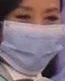

1/1 [==============================] - 0s 33ms/step
[[0.83937216 0.20073447]]
0
Orang di gambar tersebut menggunakan masker


In [39]:
import cv2

from google.colab.patches import cv2_imshow

# put the image path and print the predicted path
input_image_path = input('Masukkan path gambar yang akan di periksa: ')

# read the image from the path
input_image = cv2.imread(input_image_path)

# display your image
cv2_imshow(input_image)

# Resize the inputted image
input_image_resized = cv2.resize(input_image, (128,128))

# Scale the inputted image
input_image_scaled = input_image_resized/255

# Reshape the inputted image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# Predict the input image
input_prediction = model.predict(input_image_reshaped)

# print the input prediction label
print(input_prediction)


# input the prediction label
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Orang di gambar tersebut tidak menggunakan masker')

else:

  print('Orang di gambar tersebut menggunakan masker')

Masukkan path gambar yang akan di periksa: /content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask/without_mask_1026.jpg


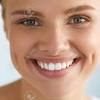

1/1 [==============================] - 0s 31ms/step
[[0.2851784 0.7260407]]
1
Orang di gambar tersebut tidak menggunakan masker


In [40]:
input_image_path = input('Masukkan path gambar yang akan di periksa: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Orang di gambar tersebut tidak menggunakan masker')

else:

  print('Orang di gambar tersebut menggunakan masker')